**Assignment 1** \\
**Classification and Regression Methods**


---

Team Members:-
Tarun Gangadhar Vadaparthi ( 50592389 ) \\
Veera Venkata Kalyan Yendru (50602533)

Data Sets:- \\
1)penguins.csv \\
2)dimond.csv \\
3)emissions_by_country.csv

Task 1 :  Data Analysis & Preprocessing

Importing Necessary Libraries:-

In [819]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Set and 2:- 

In [820]:
data1 = pd.read_csv('penguins.csv')
data2 = pd.read_csv('diamond.csv')
data3 = pd.read_csv('emissions_by_country.csv')


In [821]:
print(data1.describe())
data1.head()

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [822]:
print(data2.describe())
data2.head()

       average us salary  number of diamonds mined (millions)
count       53940.000000                         53940.000000
mean        39521.990100                             2.902669
std          5486.892971                             1.325985
min         30000.000000                             0.600000
25%         34780.000000                             1.750000
50%         39547.500000                             2.910000
75%         44252.000000                             4.050000
max         48999.000000                             5.200000


,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75


In [823]:
data1.isnull().sum()

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64

In [824]:
data2.isnull().sum()

Unnamed: 0                              377
carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64

1st Dataset

In [825]:
data1.dropna(inplace=True)

In [826]:
data1['species']=data1['species'].str.strip().str.lower().str.capitalize()
data1['island']=data1['island'].str.strip().str.lower().str.capitalize()


In [827]:
data1['species'].unique()
data1['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [828]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

columns_to_check = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']
for column in columns_to_check:
    lower_bound, upper_bound = detect_outliers_iqr(data1, column)
    data1[column] = data1[column].where((data1[column] >= lower_bound) & (data1[column] <= upper_bound), np.nan)

print("Cleaned DataFrame:\n", data1.describe())

Cleaned DataFrame:
        calorie requirement  average sleep duration  bill_length_mm  \
count           305.000000              305.000000      303.000000   
mean           5275.659016               10.508197       43.957096   
std            1064.219767                2.233293        5.514785   
min            3504.000000                7.000000       32.100000   
25%            4418.000000                9.000000       39.400000   
50%            5105.000000               10.000000       44.100000   
75%            6207.000000               12.000000       48.550000   
max            7197.000000               14.000000       59.600000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     304.000000         302.000000   305.000000   305.000000  
mean       17.201645         200.880795  4202.622951  2008.042623  
std         1.960845          14.118119   807.439507     0.816052  
min        13.100000         172.000000  2700.000000  2007.000000  
25%      

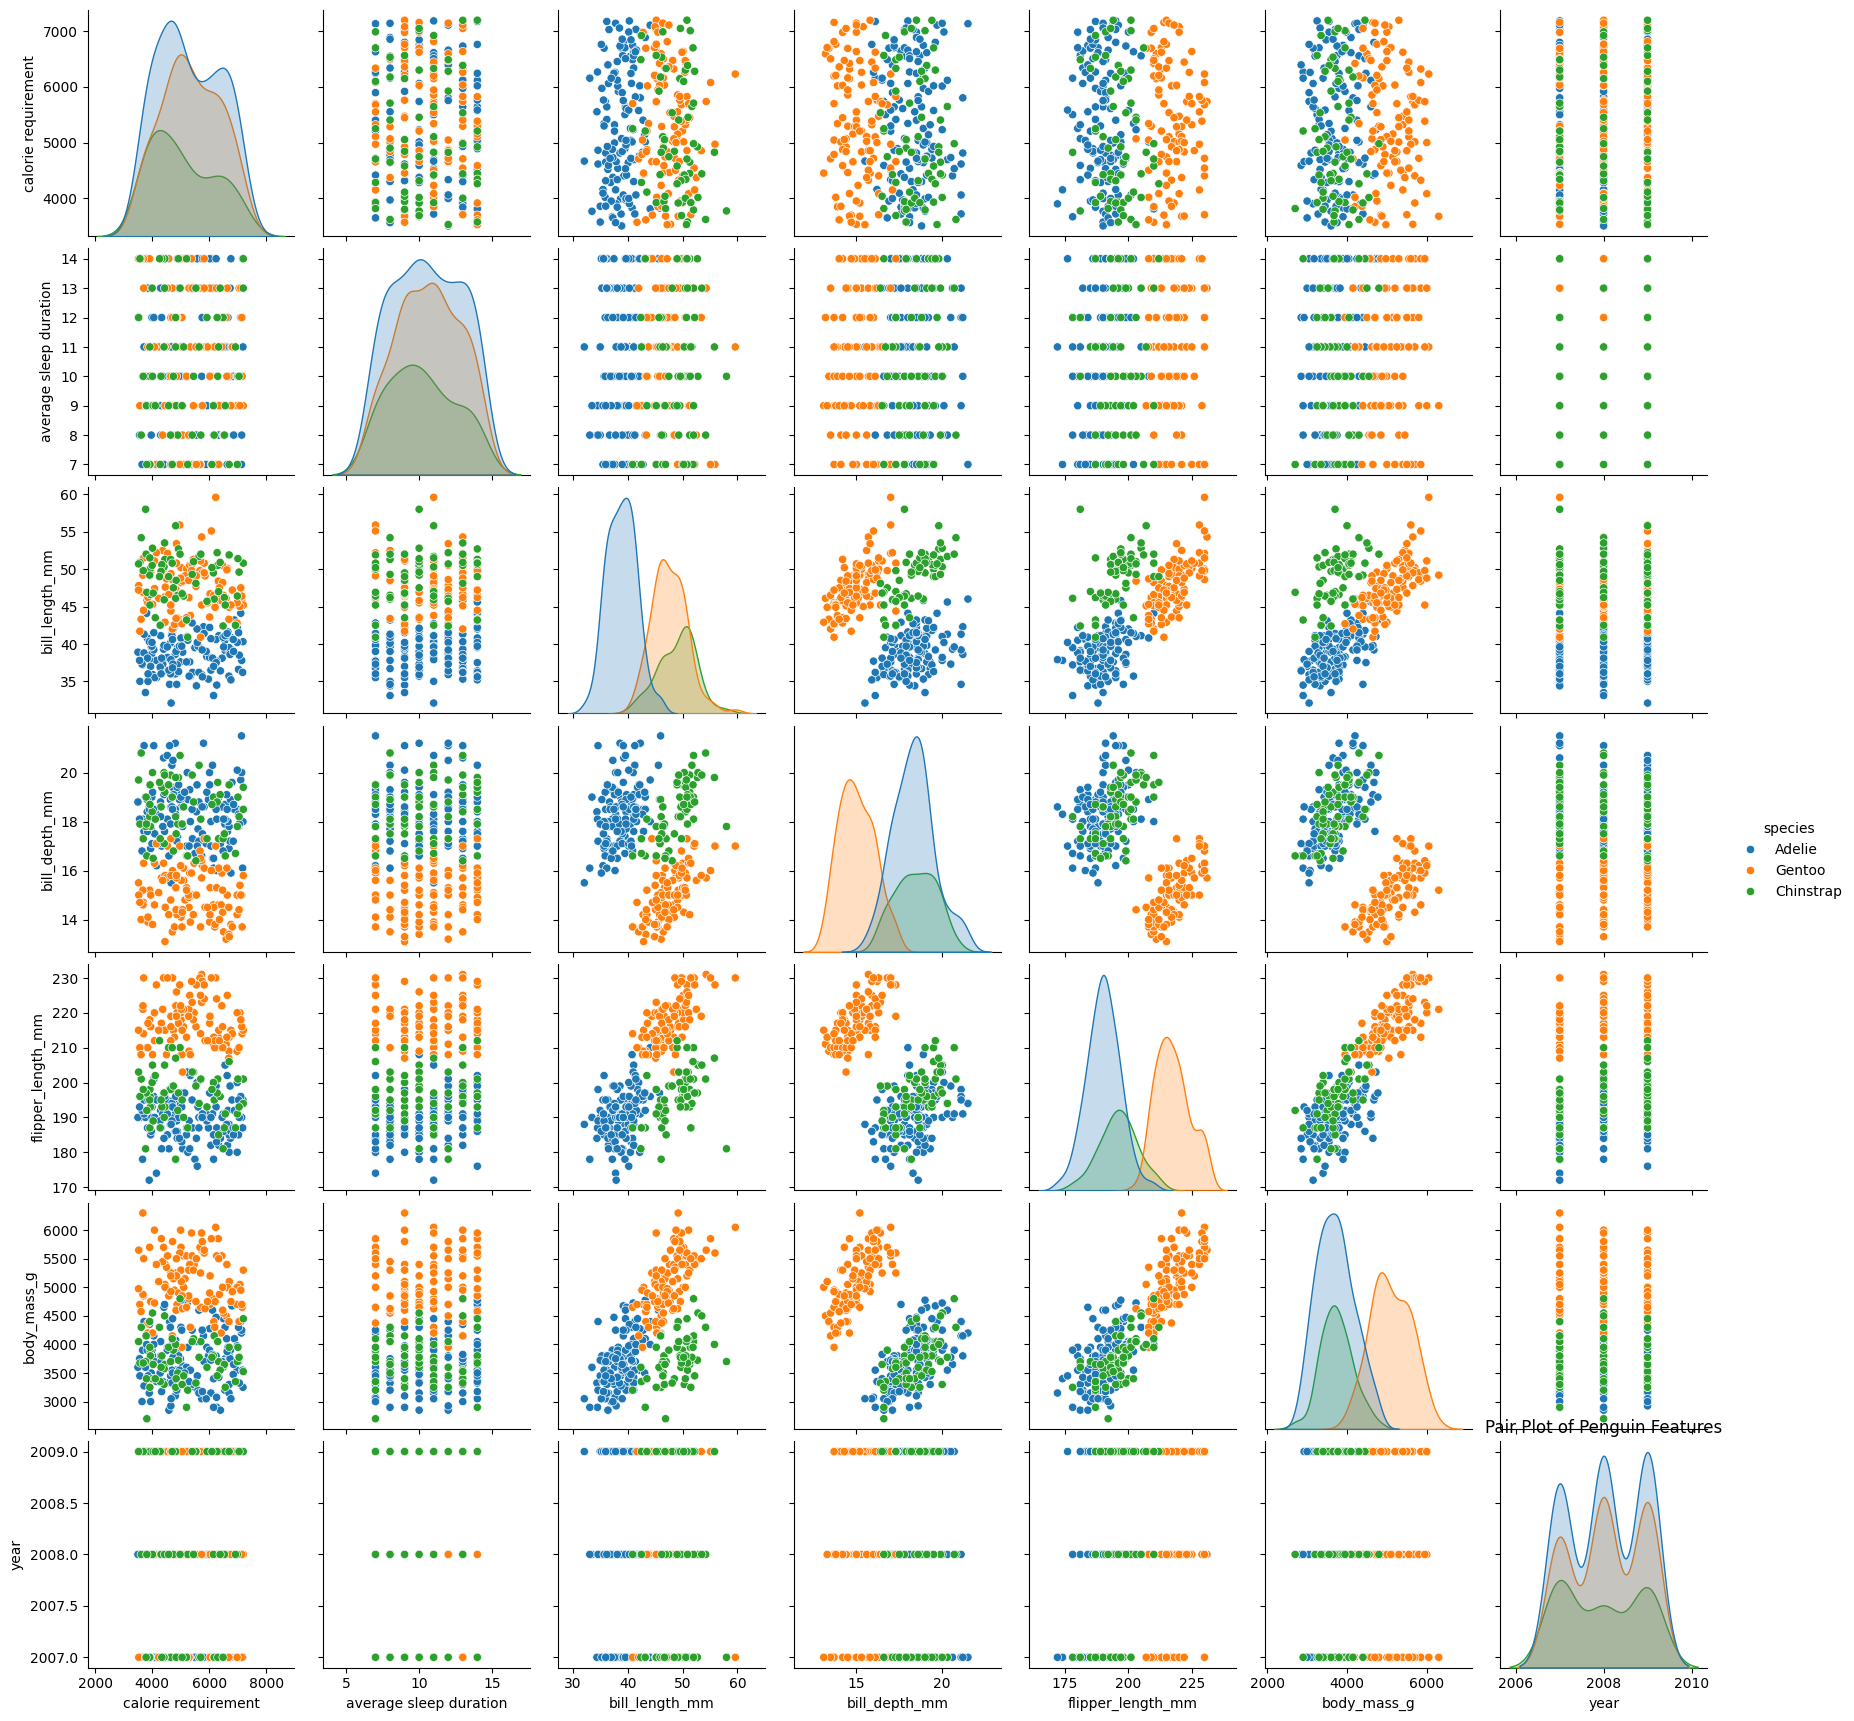

In [829]:
sns.pairplot(data1, hue='species')
plt.title('Pair Plot of Penguin Features')
plt.show()


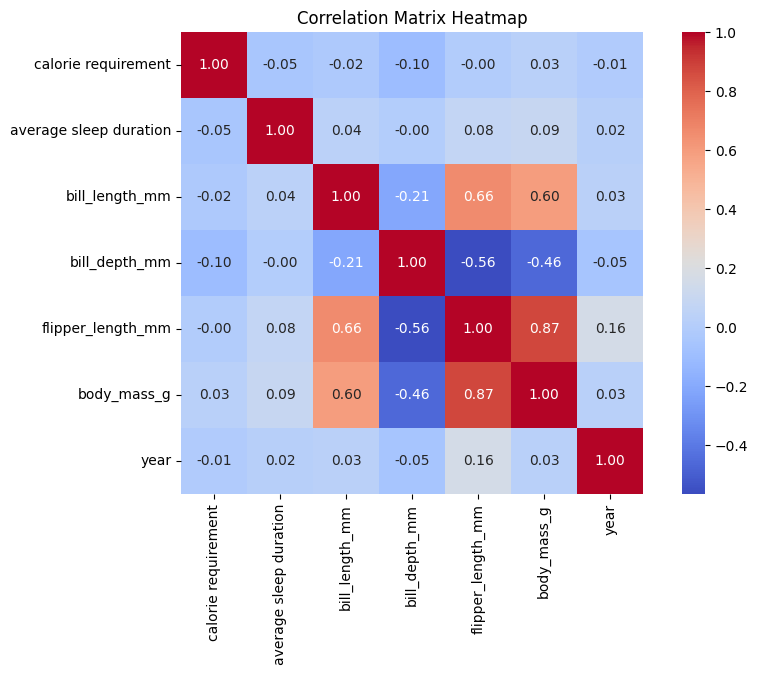

In [830]:
numerical_df = data1.select_dtypes(include=[np.number])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

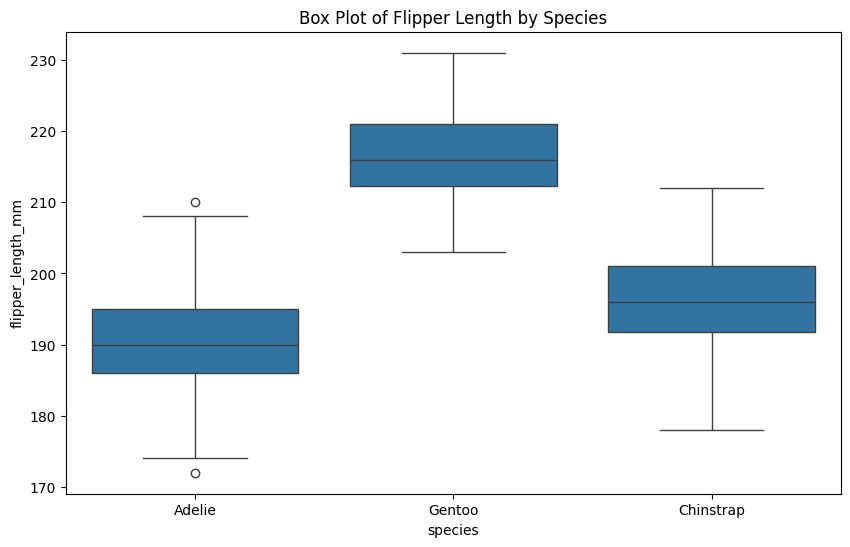

In [831]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=data1)
plt.title('Box Plot of Flipper Length by Species')
plt.show()


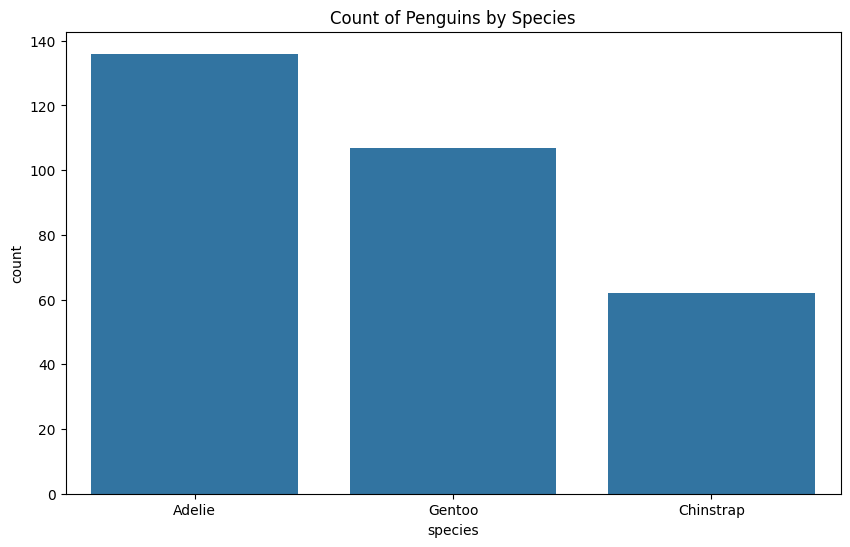

In [832]:
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=data1)
plt.title('Count of Penguins by Species')
plt.show()

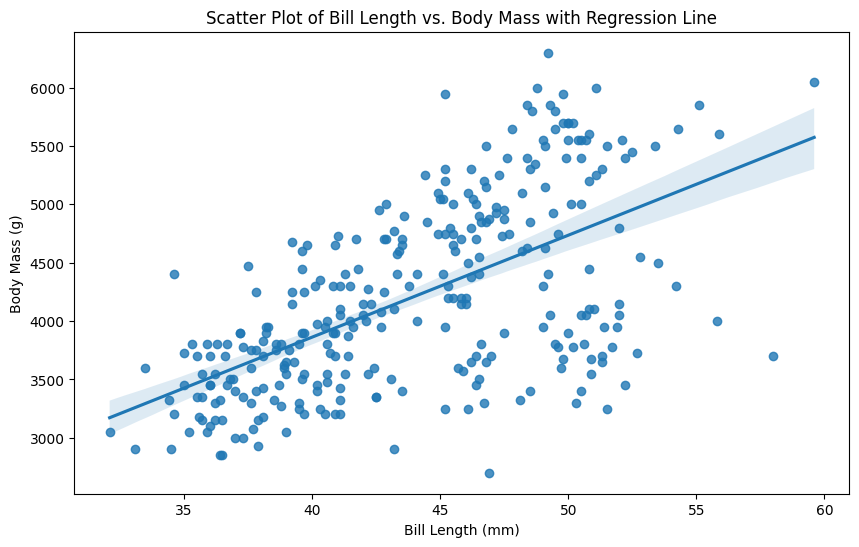

In [833]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bill_length_mm', y='body_mass_g', data=data1)
plt.title('Scatter Plot of Bill Length vs. Body Mass with Regression Line')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()


In [834]:
data1['gender'] = data1['gender'].map({'male': 1, 'female': 0})
numeric_data1 = data1.select_dtypes(include=['number'])
corr_matrix = numeric_data1.corr()
target_corr = corr_matrix['gender']
low_corr_features = target_corr[target_corr.abs() < 0.1].index.tolist()
print("Uncorrelated Features:", low_corr_features)
data1 = data1.drop(columns=low_corr_features)
print("DataFrame after dropping low correlation features:\n", data1.head())


Uncorrelated Features: ['calorie requirement', 'average sleep duration', 'year']
DataFrame after dropping low correlation features:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g  gender  
0       3750.0       1  
1       3800.0       0  
2       3250.0       0  
4       3450.0       0  
5       3650.0       1  


In [835]:
data1 = pd.get_dummies(data1, columns=['species', 'island'])

In [836]:
numeric_cols = data1.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if col != 'gender':  
        data1[col] = (data1[col] - data1[col].min()) / (data1[col].max() - data1[col].min())

# Convert boolean columns to 1 and 0
boolean_cols = data1.select_dtypes(include=[bool]).columns
for col in boolean_cols:
    data1[col] = data1[col].astype(int)

print("DataFrame after normalization:\n", data1.head())

DataFrame after normalization:
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0        0.254545       0.666667           0.152542     0.291667       1   
1        0.269091       0.511905           0.237288     0.305556       0   
2        0.298182       0.583333           0.389831     0.152778       0   
4        0.167273       0.738095           0.355932     0.208333       0   
5        0.261818       0.892857           0.305085     0.263889       1   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0               1                  0               0              0   
1               1                  0               0              0   
2               1                  0               0              0   
4               1                  0               0              0   
5               1                  0               0              0   

   island_Dream  island_Torgersen  
0             0                 1  
1           

2nd Dataset:-

In [837]:
print(data2.head())
print(data2.info())
print(data2.describe())

  Unnamed: 0 carat      cut color clarity  average us salary  \
0          1  0.23    Ideal     E     SI2              31282   
1          2  0.21  Premium     E     SI1              40049   
2          3  0.23     Good     E     VS1              33517   
3          4  0.29  Premium     I     VS2              38495   
4          5  0.31     Good     J     SI2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               No

In [838]:
data2 = data2[~data2.isin(['TRUE', 'FALSE', 'MAYBE']).any(axis=1)]
print(data2.isnull().sum())

def to_numeric_or_nan(value, exclude=False):
    if exclude:
        return value  
    try:
        return pd.to_numeric(value)
    except ValueError:
        return np.nan

exclude_columns = ['cut', 'color', 'clarity']

for col in data2.columns:
    if col not in exclude_columns:
        data2[col] = data2[col].apply(lambda x: to_numeric_or_nan(x))
    else:
        data2[col] = data2[col].astype('object')  

numeric_cols = data2.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    data2[col].fillna(data2[col].mean(), inplace=True)

categorical_cols = data2.select_dtypes(include=[object]).columns
for col in categorical_cols:
    data2[col].fillna(data2[col].mode()[0], inplace=True)

print(data2.head())
print(data2.info())
print(data2.isnull().sum())

print(data2.describe())

Unnamed: 0                              29
carat                                  122
cut                                    114
color                                  126
clarity                                 31
average us salary                        0
number of diamonds mined (millions)      0
depth                                   67
table                                  128
price                                   87
x                                      132
y                                       80
z                                      115
dtype: int64
   Unnamed: 0  carat      cut color clarity  average us salary  \
0         1.0   0.23    Ideal     E     SI2              31282   
1         2.0   0.21  Premium     E     SI1              40049   
2         3.0   0.23     Good     E     VS1              33517   
3         4.0   0.29  Premium     I     VS2              38495   
4         5.0   0.31     Good     J     SI2              34178   

   number of diamonds mined (mi

In [839]:
print(data2.isnull().sum())


Unnamed: 0                             0
carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64


In [840]:
for column in data2.select_dtypes(include=['object']).columns:
    data2[column] = data2[column].str.upper()
data2


,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1.0,0.23,IDEAL,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,PREMIUM,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,GOOD,E,VS1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,4.0,0.29,PREMIUM,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,5.0,0.31,GOOD,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936.0,0.72,IDEAL,D,SI1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53937.0,0.72,GOOD,D,SI1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53938.0,0.70,VERY GOOD,D,SI1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53939.0,0.86,PREMIUM,H,SI2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


In [841]:
data2.describe()

,Unnamed: 0,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
count,49110.000000,49110.000000,49110.000000,49110.000000,49110.000000,49110.000000,49110.000000,49110.000000,49110.000000,49110.000000
mean,26978.109044,0.797462,39500.310364,2.901535,61.751591,57.454326,3931.453338,5.729886,5.732929,3.538299
std,15571.791543,0.472935,5483.288146,1.326397,1.432791,2.227862,3986.709851,1.119646,1.143505,0.705838
min,1.000000,0.200000,30000.000000,0.600000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,13492.250000,0.400000,34752.250000,1.750000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26978.109044,0.700000,39527.000000,2.900000,61.800000,57.000000,2402.000000,5.700000,5.710000,3.530000
75%,40481.750000,1.040000,44219.750000,4.050000,62.500000,59.000000,5312.000000,6.540000,6.530000,4.030000
max,53940.000000,5.010000,48999.000000,5.200000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


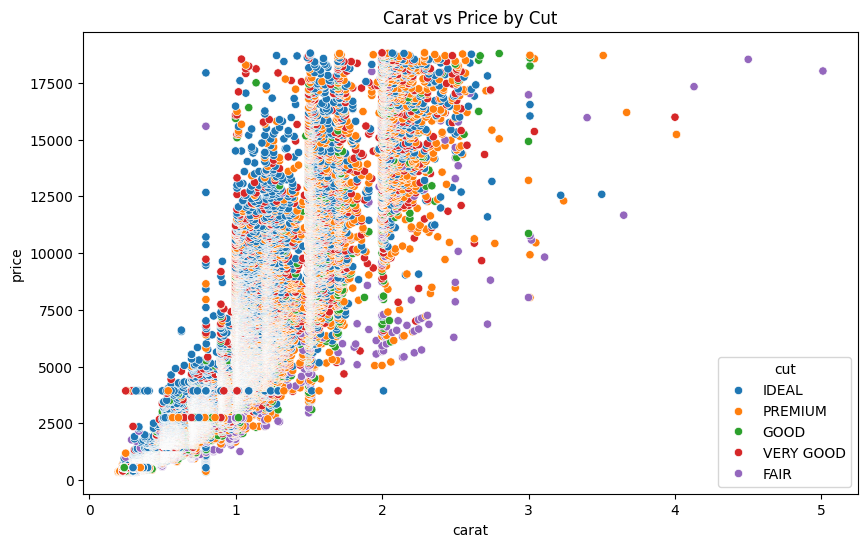

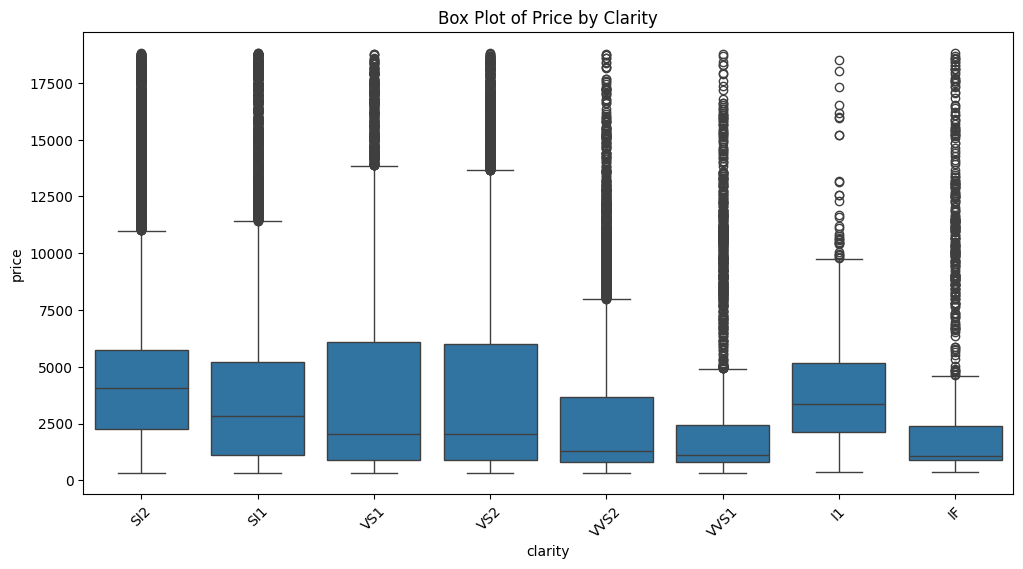

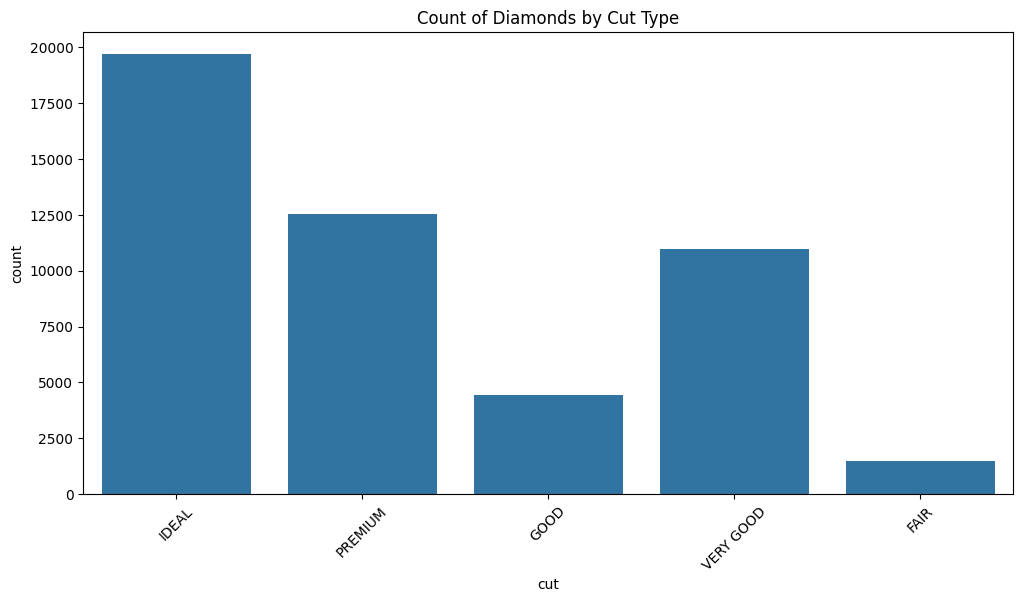

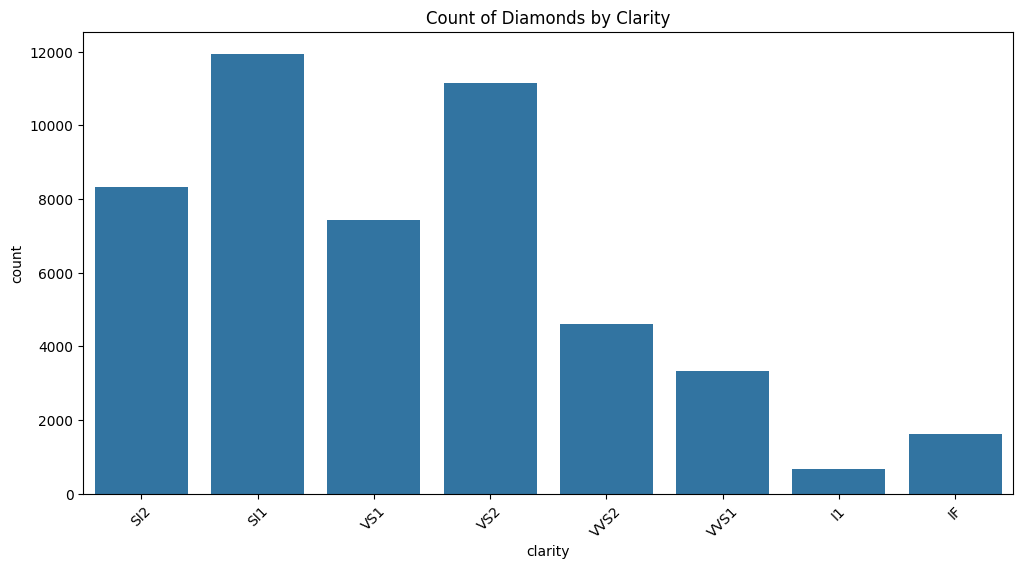

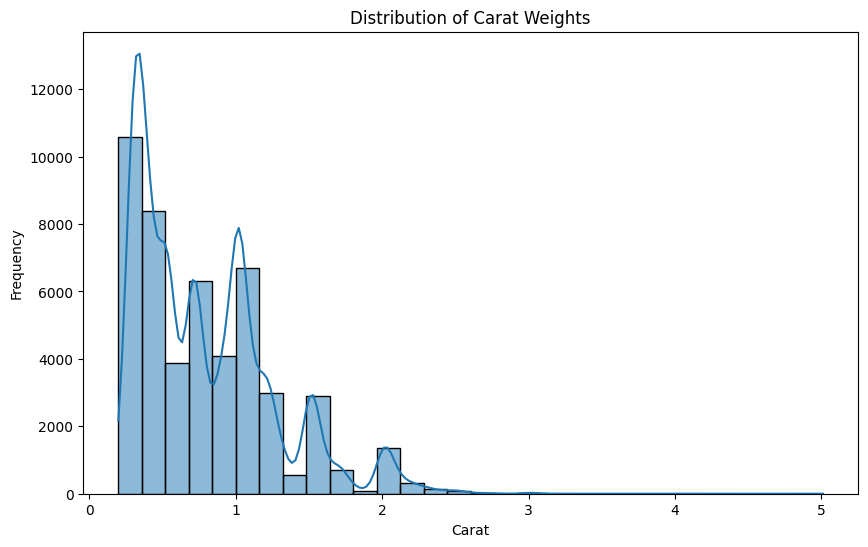

In [842]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='cut', data=data2)
plt.title('Carat vs Price by Cut')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', data=data2)
plt.title('Box Plot of Price by Clarity')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='cut', data=data2)
plt.title('Count of Diamonds by Cut Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='clarity', data=data2)
plt.title('Count of Diamonds by Clarity')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data2['carat'], bins=30, kde=True)
plt.title('Distribution of Carat Weights')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

In [843]:
if 'Unnamed: 0' in data2.columns:
    data2.drop(columns=['Unnamed: 0'], inplace=True)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

columns_to_check = ['carat', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x', 'y', 'z']
for column in columns_to_check:
    lower_bound, upper_bound = detect_outliers_iqr(data2, column)
    data2[column] = data2[column].where((data2[column] >= lower_bound) & (data2[column] <= upper_bound), np.nan)

data2=data2.dropna()
print("Cleaned DataFrame:\n", data2.describe())

Cleaned DataFrame:
               carat  average us salary  number of diamonds mined (millions)  \
count  43264.000000       43264.000000                         43264.000000   
mean       0.708410       39488.581685                             2.904627   
std        0.370057        5488.059294                             1.327566   
min        0.200000       30000.000000                             0.600000   
25%        0.380000       34722.000000                             1.760000   
50%        0.610000       39517.500000                             2.910000   
75%        1.010000       44217.250000                             4.050000   
max        2.000000       48999.000000                             5.200000   

              depth         table         price             x             y  \
count  43264.000000  43264.000000  43264.000000  43264.000000  43264.000000   
mean      61.786238     57.261288   3107.176760      5.546141      5.550305   
std        1.104102      2.0169

In [844]:
data2['cut'] = data2['cut'].map({'PREMIUM': 1, 'FAIR': 0, 'GOOD': 0, 'VERY GOOD': 0, 'IDEAL': 0})
numeric_data2 = data2.select_dtypes(include=['number'])
corr_matrix = numeric_data2.corr()
target_corr = corr_matrix['cut']
low_corr_features = target_corr[target_corr.abs() < 0.1].index.tolist()
print("Uncorrelated Features:", low_corr_features)
data2 = data2.drop(columns=low_corr_features)
print("DataFrame after dropping low correlation features:\n", data2.head())

Uncorrelated Features: ['average us salary', 'number of diamonds mined (millions)', 'price', 'y', 'z']
DataFrame after dropping low correlation features:
    carat  cut color clarity  depth  table     x
0   0.23    0     E     SI2   61.5   55.0  3.95
1   0.21    1     E     SI1   59.8   61.0  3.89
3   0.29    1     I     VS2   62.4   58.0  4.20
4   0.31    0     J     SI2   63.3   58.0  4.34
5   0.24    0     J    VVS2   62.8   57.0  3.94


/var/folders/j7/q8ll48f54bb8t2t33x5hhn1w0000gn/T/ipykernel_51929/1804097800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cut'] = data2['cut'].map({'PREMIUM': 1, 'FAIR': 0, 'GOOD': 0, 'VERY GOOD': 0, 'IDEAL': 0})


In [845]:
data2 = pd.get_dummies(data2, columns=['color', 'clarity'])
data2.head()


,carat,cut,depth,table,x,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,0,61.5,55.0,3.95,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,0.21,1,59.8,61.0,3.89,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0.29,1,62.4,58.0,4.20,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,0.31,0,63.3,58.0,4.34,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
5,0.24,0,62.8,57.0,3.94,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [846]:
numeric_cols = data2.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if col != 'cut':  
        data2[col] = (data2[col] - data2[col].min()) / (data2[col].max() - data2[col].min())

print("DataFrame after normalization:\n", data2.head())

DataFrame after normalization:
       carat  cut     depth     table         x  color_D  color_E  color_F  \
0  0.016667    0  0.457627  0.260870  0.045361    False     True    False   
1  0.005556    1  0.169492  0.782609  0.032990    False     True    False   
3  0.050000    1  0.610169  0.521739  0.096907    False    False    False   
4  0.061111    0  0.762712  0.521739  0.125773    False    False    False   
5  0.022222    0  0.677966  0.434783  0.043299    False    False    False   

   color_G  color_H  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0    False    False    False    False       False       False        False   
1    False    False    False    False       False       False         True   
3    False    False     True    False       False       False        False   
4    False    False    False     True       False       False        False   
5    False    False    False     True       False       False        False   

   clarity_SI2  clarity_VS1  clarity

Data Set :3

Reading the file

In [847]:
data3 = pd.read_csv('emissions_by_country.csv')

Displaying first few rows

In [848]:
print(data3.head())

       Country ISO 3166-1 alpha-3    Year  Total  Temperature  \
0  Afghanistan                AFG  1750.0    0.0           70   
1  Afghanistan                AFG  1751.0    0.0           66   
2  Afghanistan                AFG  1752.0    0.0           72   
3  Afghanistan                AFG  1753.0    0.0           44   
4  Afghanistan                AFG  1754.0    0.0           21   

   GDP Per Capita (USD)  Coal  Oil  Gas  Cement  Flaring  Other  Per Capita  
0                 55455   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
1                 45101   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
2                 31891   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
3                 35466   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
4                 33247   NaN  NaN  NaN     NaN      NaN    NaN         NaN  


Displaying the statistics

In [849]:
print(data3.describe())

               Year         Total   Temperature  GDP Per Capita (USD)  \
count  62307.000000  62381.000000  63104.000000          63104.000000   
mean    1888.267097     73.683456     49.497813          39026.539015   
std      122.651184    843.930381     17.292092          10975.539432   
min     1003.000000      0.000000     20.000000          20000.000000   
25%     1816.000000      0.000000     35.000000          29498.750000   
50%     1886.000000      0.000000     49.000000          39067.000000   
75%     1955.000000      0.659520     64.000000          48544.250000   
max     2999.000000  37123.850352     79.000000          57999.000000   

               Coal           Oil           Gas        Cement       Flaring  \
count  21797.000000  21774.000000  21717.000000  20488.000000  21338.000000   
mean     127.387271    153.480038    125.162671     62.599364     56.074327   
std      677.951392    670.830891    514.391435    353.918064    337.629062   
min        0.000000      0

Checking the missing values in the dataset

In [850]:
print(data3.isnull().sum())

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64


Removing the numeric missing values using the mean 

In [851]:
numeric_cols=data3.select_dtypes(include=[np.number]).columns 
data3[numeric_cols]=data3[numeric_cols].fillna(data3[numeric_cols].mean())

In [852]:
print(data3.isnull().sum())

Country                 2017
ISO 3166-1 alpha-3      3621
Year                       0
Total                      0
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


First Standardizing the country names and ISO column and then checking for the sttring column outliers.

In [853]:
print(data3['Country'].unique())
print(data3['ISO 3166-1 alpha-3'].unique())

['Afghanistan' 'afghanistan' nan 'AFGHANISTAN' 'Albania' 'Algeria'
 'ALGERIA' 'algeria' 'Andorra' 'andorra' 'ANDORRA' 'Angola' 'angola'
 'ANGOLA' 'Anguilla' 'anguilla' 'ANGUILLA' 'Antarctica' 'antarctica'
 'ANTARCTICA' 'Antigua and Barbuda' 'ANTIGUA AND BARBUDA'
 'antigua and barbuda' 'ARGENTINA' 'Argentina' 'argentina' 'Armenia'
 'ARMENIA' 'armenia' 'Aruba' 'aruba' 'ARUBA' 'Australia' 'AUSTRALIA'
 'australia' 'Austria' 'austria' 'AUSTRIA' 'Azerbaijan' 'azerbaijan'
 'AZERBAIJAN' 'Bahamas' 'bahamas' 'Bahrain' 'bahrain' 'Bangladesh'
 'BANGLADESH' 'Barbados' 'barbados' 'BARBADOS' 'Belarus' 'BELARUS'
 'belarus' 'Belgium' 'belgium' 'BELGIUM' 'Belize' 'belize' 'Benin' 'benin'
 'Bermuda' 'bermuda' 'BERMUDA' 'Bhutan' 'bhutan' 'BHUTAN'
 'Bonaire, Saint Eustatius and Saba' 'BONAIRE, SAINT EUSTATIUS AND SABA'
 'bonaire, saint eustatius and saba' 'Bosnia and Herzegovina'
 'bosnia and herzegovina' 'Botswana' 'BOTSWANA' 'Brazil' 'BRAZIL' 'brazil'
 'British Virgin Islands' 'BRITISH VIRGIN ISLANDS'
 '

In [854]:
data3['Country']=data3['Country'].str.title().str.strip()
print(data3['Country'].unique())

['Afghanistan' nan 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua And Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte D'Ivoire"
 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic Of The Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Micronesia (Federated States Of)' 'Fiji' 'Finland' 'Panama Canal Zone'
 'France' 'French Equatorial Africa' 'French Guiana' '

In [855]:
data3['ISO 3166-1 alpha-3']=data3['ISO 3166-1 alpha-3'].str.upper().str.strip()
print(data3['ISO 3166-1 alpha-3'].unique())


['AFG' nan 'ALB' 'DZA' 'AND' 'AGO' 'AIA' 'ATA' 'ATG' 'ARG' 'ARM' 'ABW'
 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU'
 'BTN' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CAN'
 'CPV' 'CAF' 'TCD' 'CHL' 'CHN' 'CXR' 'COL' 'COM' 'COG' 'COK' 'CRI' 'CIV'
 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'PRK' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU'
 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'ETH' 'FRO' 'FSM' 'FJI' 'FIN' 'PCZ' 'FRA'
 'GUF' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL' 'GRD' 'GLP' 'GTM'
 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRQ' 'IRL'
 'IRN' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KSV' 'KWT' 'KGZ'
 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MKD' 'MDG'
 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MTQ' 'MRT' 'MUS' 'MYT' 'MEX' 'MNG'
 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC'
 'NER' 'NGA' 'NIU' 'NOR' 'PSE' 'OMN' 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER'
 'PHL' 'BOL' 'POL' 'PRT' 'PRI' 'QAT' 'CMR' 'KOR' 'MDA

Checking for outliers

In [856]:
print(data3.isnull().sum())

Country                 2017
ISO 3166-1 alpha-3      3621
Year                       0
Total                      0
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


Imputing the string missing values by mode

In [857]:
country_mode=data3['Country'].mode()[0]
data3['Country'].fillna(country_mode, inplace=True)
iso_mode=data3['ISO 3166-1 alpha-3'].mode()[0]
data3['ISO 3166-1 alpha-3'].fillna(iso_mode, inplace=True)
print(data3[['Country', 'ISO 3166-1 alpha-3']].isnull().sum())


Country               0
ISO 3166-1 alpha-3    0
dtype: int64


Checking the outliers for the numeric columns

In [858]:
numeric_cols=data3.select_dtypes(include=[np.number]).columns

Q1=data3[numeric_cols].quantile(0.25)
Q3=data3[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers=(data3[numeric_cols] <(Q1 - 1.5 * IQR)) |(data3[numeric_cols] >(Q3 + 1.5 * IQR))
print(outliers.sum())


Year                     1145
Total                   13520
Temperature                 0
GDP Per Capita (USD)        0
Coal                     1362
Oil                      1489
Gas                      1319
Cement                    682
Flaring                   641
Other                    2685
Per Capita               1158
dtype: int64


Imputing the outliers using median

In [859]:
for col in numeric_cols:
    Q1=data3[col].quantile(0.25)
    Q3=data3[col].quantile(0.75)
    IQR =Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    median=data3[col].median()
    data3[col]=np.where((data3[col] <lower_bound)|(data3[col] >upper_bound),median,data3[col])

print(data3.describe())


               Year         Total   Temperature  GDP Per Capita (USD)  \
count  63104.000000  63104.000000  63104.000000          63104.000000   
mean    1885.539726      0.076860     49.497813          39026.539015   
std       78.243050      0.284065     17.292092          10975.539432   
min     1612.000000      0.000000     20.000000          20000.000000   
25%     1819.000000      0.000000     35.000000          29498.750000   
50%     1888.000000      0.000000     49.000000          39067.000000   
75%     1952.000000      0.000000     64.000000          48544.250000   
max     2160.000000      2.088480     79.000000          57999.000000   

               Coal           Oil           Gas        Cement       Flaring  \
count  63104.000000  63104.000000  63104.000000  63104.000000  63104.000000   
mean      90.061382    108.980433     86.905429     43.444928     37.988535   
std       57.592458     69.273635     57.141580     28.535833     26.053672   
min        0.000000      0

Checking for outliers again

In [860]:
numeric_cols=data3.select_dtypes(include=[np.number]).columns

Q1=data3[numeric_cols].quantile(0.25)
Q3=data3[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers=(data3[numeric_cols]<(Q1-1.5*IQR))|(data3[numeric_cols] >(Q3 +1.5*IQR))
print(outliers.sum())


Year                      18
Total                   9151
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


Capping the years range between 1750 and 2023

In [861]:
data3['Year']=data3['Year'].clip(lower=1750,upper=2023)
print(data3['Year'].describe())

count    63104.000000
mean      1885.534528
std         77.635885
min       1750.000000
25%       1819.000000
50%       1888.000000
75%       1952.000000
max       2023.000000
Name: Year, dtype: float64


Appling mean to impute the outliers

In [862]:
Q1_total=data3['Total'].quantile(0.25)
Q3_total=data3['Total'].quantile(0.75)
IQR_total=Q3_total-Q1_total

lower_bound_total=Q1_total-1.5*IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

mean_total=data3['Total'].mean()

data3['Total']=data3['Total'].apply(lambda x: mean_total if x < lower_bound_total or x > upper_bound_total else x)
print(data3['Total'].describe())


count    63104.000000
mean         0.011146
std          0.027064
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.076860
Name: Total, dtype: float64


In [863]:
numeric_cols = data3.select_dtypes(include=[np.number]).columns
Q1=data3[numeric_cols].quantile(0.25)
Q3=data3[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers=(data3[numeric_cols] <(Q1-1.5*IQR))|(data3[numeric_cols] >(Q3+1.5*IQR))
print(outliers.sum())


Year                       0
Total                   9151
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


Applying the mean to trying to rempve outliers in the Total column

In [864]:
Q1_total=data3['Total'].quantile(0.25)
Q3_total=data3['Total'].quantile(0.75)
IQR_total = Q3_total-Q1_total

lower_bound_total=Q1_total-1.5*IQR_total
upper_bound_total=Q3_total+1.5*IQR_total

mean_total=data3['Total'].mean()

data3['Total']=data3['Total'].apply(lambda x: mean_total if x < lower_bound_total or x > upper_bound_total else x)

Checking for outliers again

In [865]:
numeric_cols = data3.select_dtypes(include=[np.number]).columns
Q1=data3[numeric_cols].quantile(0.25)
Q3=data3[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers=(data3[numeric_cols] <(Q1-1.5*IQR))|(data3[numeric_cols] >(Q3+1.5*IQR))
print(outliers.sum())


Year                       0
Total                   9151
Temperature                0
GDP Per Capita (USD)       0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita                 0
dtype: int64


The outliers in the total column may be genuine because inspite of applying capping, mean, median techiques even one outlier isn't reducing.So leaving them as it is

Histogram fo numeric features

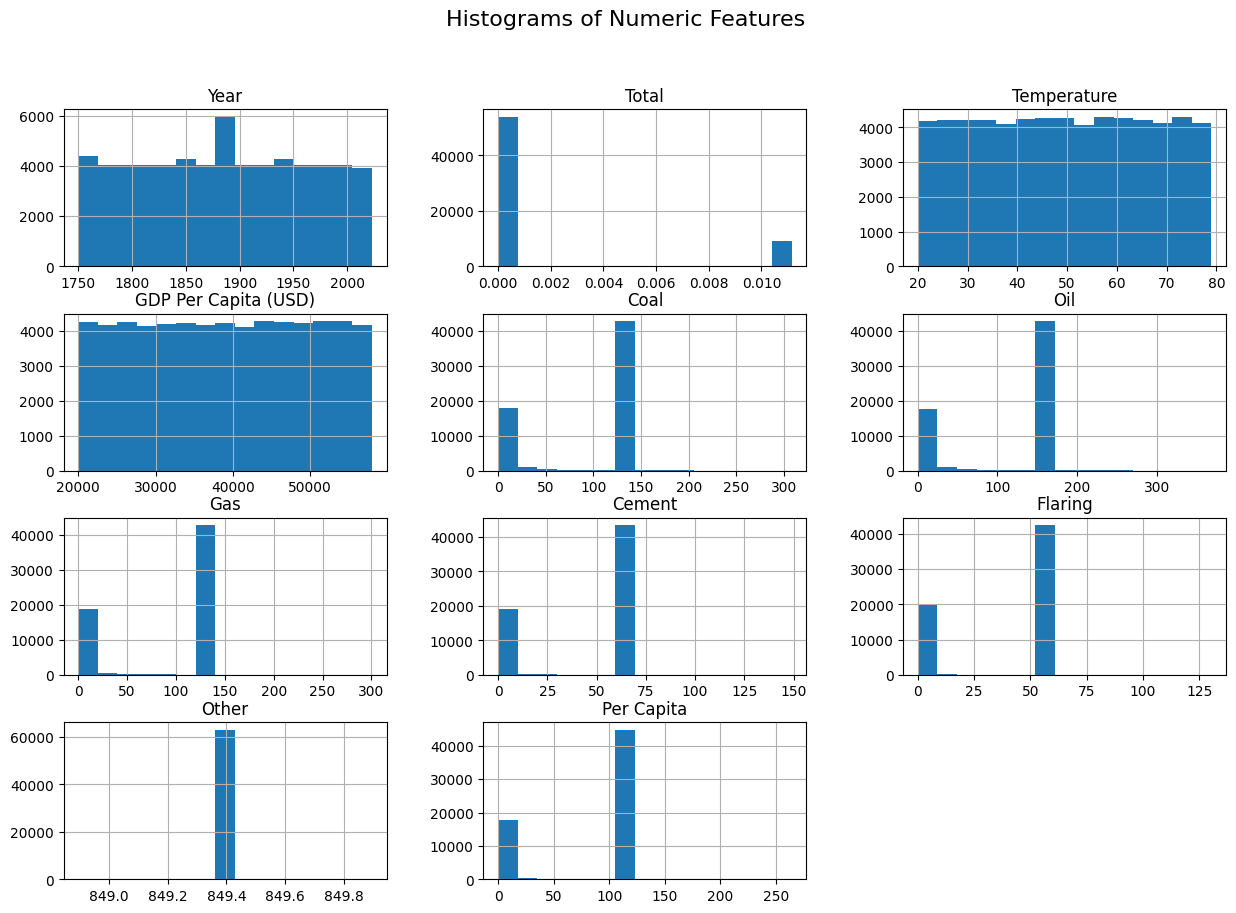

In [866]:
data3.select_dtypes(include=[np.number]).hist(bins=15,figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features',fontsize=16)
plt.show()

Box plot for Oil, Gas and Cement Column

(array([1, 2, 3]),
 [Text(1, 0, 'Oil'), Text(2, 0, 'Gas'), Text(3, 0, 'Cement')])

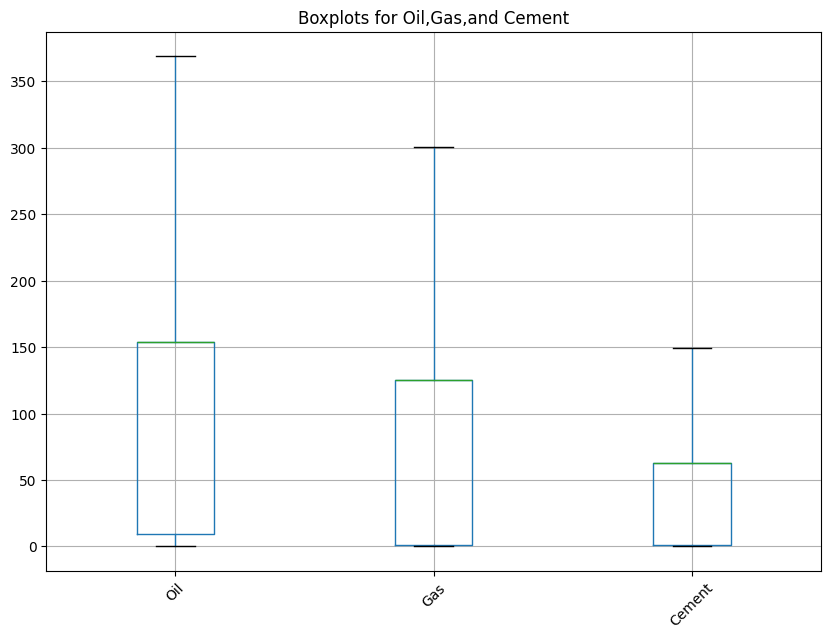

In [867]:
plt.figure(figsize=(10,7))
data3[['Oil','Gas','Cement']].boxplot()
plt.title('Boxplots for Oil,Gas,and Cement')
plt.xticks(rotation=45) 

Correlation Matrix Heatmap

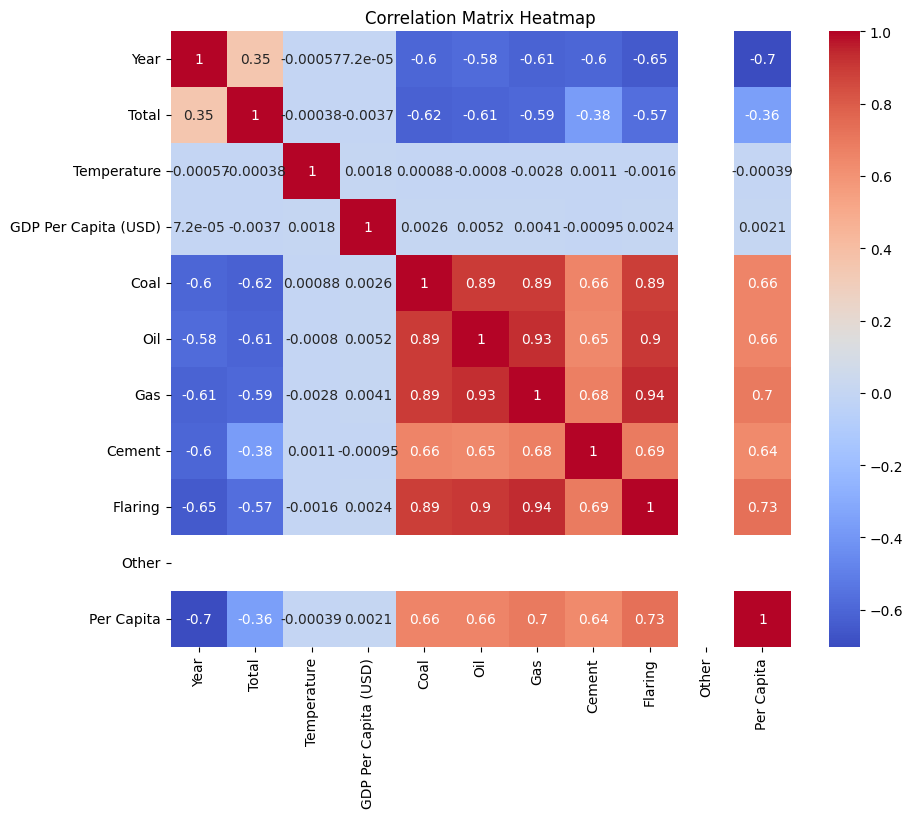

In [868]:
numeric_cols=data3.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
corr_matrix=numeric_cols.corr()

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Bar Plot for Top 10 countries vs Total Emissions

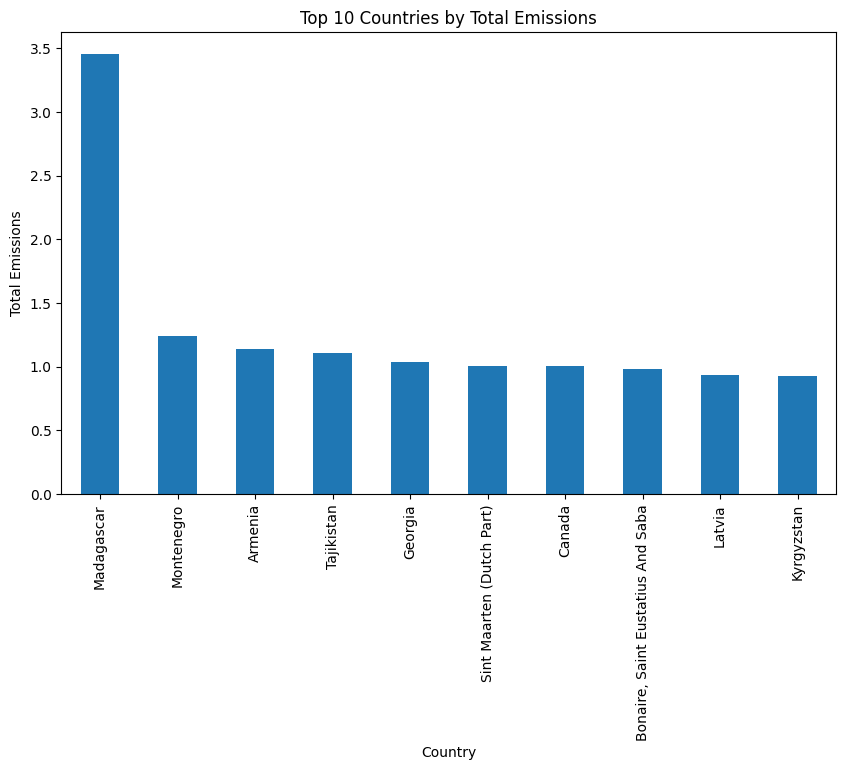

In [869]:
top_10_countries=data3.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_10_countries.plot(kind='bar')
plt.title('Top 10 Countries by Total Emissions')
plt.ylabel('Total Emissions')
plt.xlabel('Country')
plt.show()

Scatter Plot for Coal vs Gas

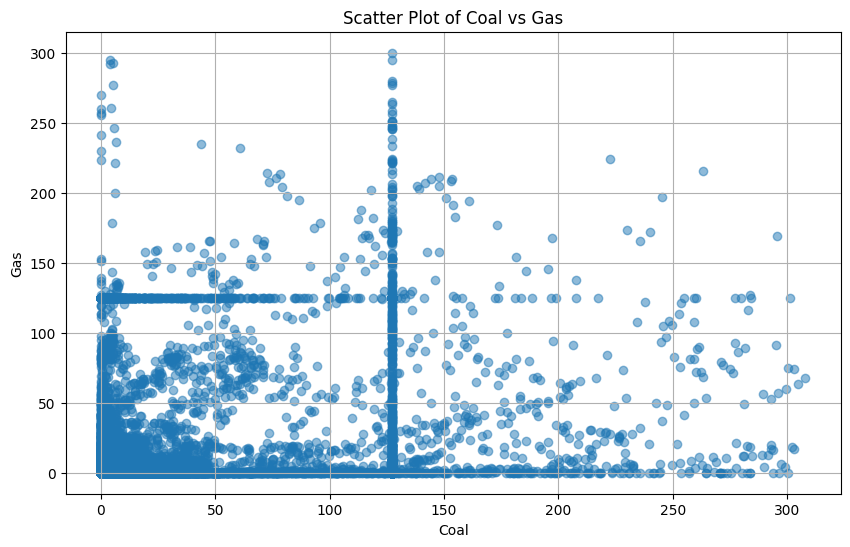

In [870]:
plt.figure(figsize=(10, 6))
plt.scatter(data3['Coal'],data3['Gas'],alpha=0.5)
plt.title('Scatter Plot of Coal vs Gas')
plt.xlabel('Coal')
plt.ylabel('Gas')
plt.grid(True)
plt.show()

lets take our feature variable as coal

In [871]:

numeric_data=data3.select_dtypes(include=[float, int])
correlation_matrix=numeric_data.corr()
correlation_with_temperature=correlation_matrix['Coal']
print(correlation_with_temperature)


Year                   -0.600984
Total                  -0.623267
Temperature             0.000881
GDP Per Capita (USD)    0.002634
Coal                    1.000000
Oil                     0.894037
Gas                     0.894869
Cement                  0.655831
Flaring                 0.889361
Other                        NaN
Per Capita              0.659820
Name: Coal, dtype: float64


Dropping the other column

In [872]:
data3=data3.drop('Other', axis=1)

In [873]:
threshold = 0.1
low_correlation_features=['Temperature','GDP Per Capita (USD)']
data_cleaned = data3.drop(low_correlation_features, axis=1)
print(data_cleaned.head())

       Country ISO 3166-1 alpha-3    Year  Total        Coal         Oil  \
0  Afghanistan                AFG  1750.0    0.0  127.387271  153.480038   
1  Afghanistan                AFG  1751.0    0.0  127.387271  153.480038   
2  Afghanistan                AFG  1752.0    0.0  127.387271  153.480038   
3  Afghanistan                AFG  1753.0    0.0  127.387271  153.480038   
4  Afghanistan                AFG  1754.0    0.0  127.387271  153.480038   

          Gas     Cement    Flaring  Per Capita  
0  125.162671  62.599364  56.074327  121.565443  
1  125.162671  62.599364  56.074327  121.565443  
2  125.162671  62.599364  56.074327  121.565443  
3  125.162671  62.599364  56.074327  121.565443  
4  125.162671  62.599364  56.074327  121.565443  


In [874]:
data_encoded = pd.get_dummies(data3, columns=['Country', 'ISO 3166-1 alpha-3'],drop_first=True)
numeric_columns = ['Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring']
for col in numeric_columns:
    min_val = data_encoded[col].min()
    max_val = data_encoded[col].max()
    data_encoded[col] = (data_encoded[col] - min_val) / (max_val - min_val)
print(data_encoded.head())

       Year  Total  Temperature  GDP Per Capita (USD)      Coal       Oil  \
0  0.000000    0.0         70.0               55455.0  0.413554  0.416058   
1  0.003663    0.0         66.0               45101.0  0.413554  0.416058   
2  0.007326    0.0         72.0               31891.0  0.413554  0.416058   
3  0.010989    0.0         44.0               35466.0  0.413554  0.416058   
4  0.014652    0.0         21.0               33247.0  0.413554  0.416058   

        Gas    Cement   Flaring  Per Capita  ...  ISO 3166-1 alpha-3_VNM  \
0  0.416578  0.420126  0.429877  121.565443  ...                   False   
1  0.416578  0.420126  0.429877  121.565443  ...                   False   
2  0.416578  0.420126  0.429877  121.565443  ...                   False   
3  0.416578  0.420126  0.429877  121.565443  ...                   False   
4  0.416578  0.420126  0.429877  121.565443  ...                   False   

   ISO 3166-1 alpha-3_VUT  ISO 3166-1 alpha-3_WLD  ISO 3166-1 alpha-3_WLF  \
0  